In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data from the CSV file
data = pd.read_csv('dj/AAPL.csv',index_col=0,parse_dates=True)

C:\Users\Idris Khan\AppData\Local\Temp\ipykernel_14180\4086588897.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('dj/AAPL.csv',index_col=0,parse_dates=True)


In [3]:
data.shape

(250, 7)

In [4]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Movements    float64
dtype: object

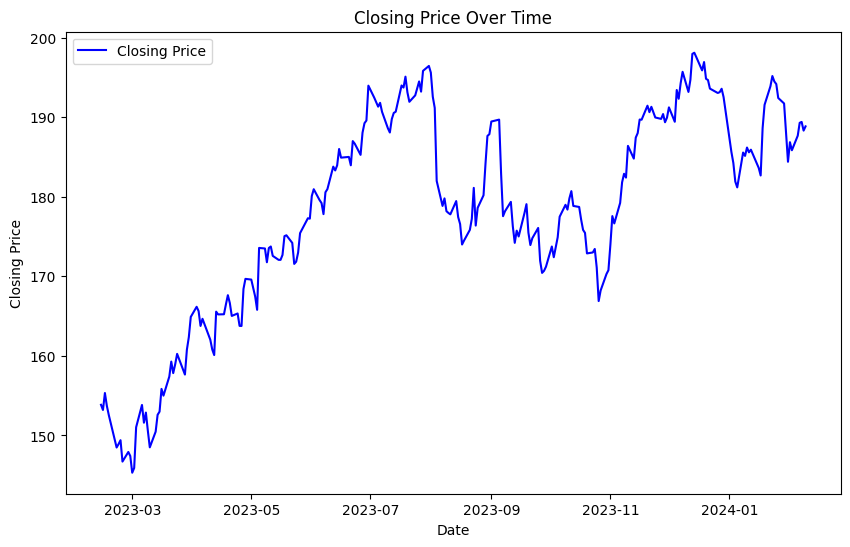

In [5]:
# Plotting Line Chart (Closing Price)
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

C:\Users\Idris Khan\AppData\Local\Temp\ipykernel_14180\1361146062.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc_data['Date'] = ohlc_data['Date'].apply(mdates.date2num)


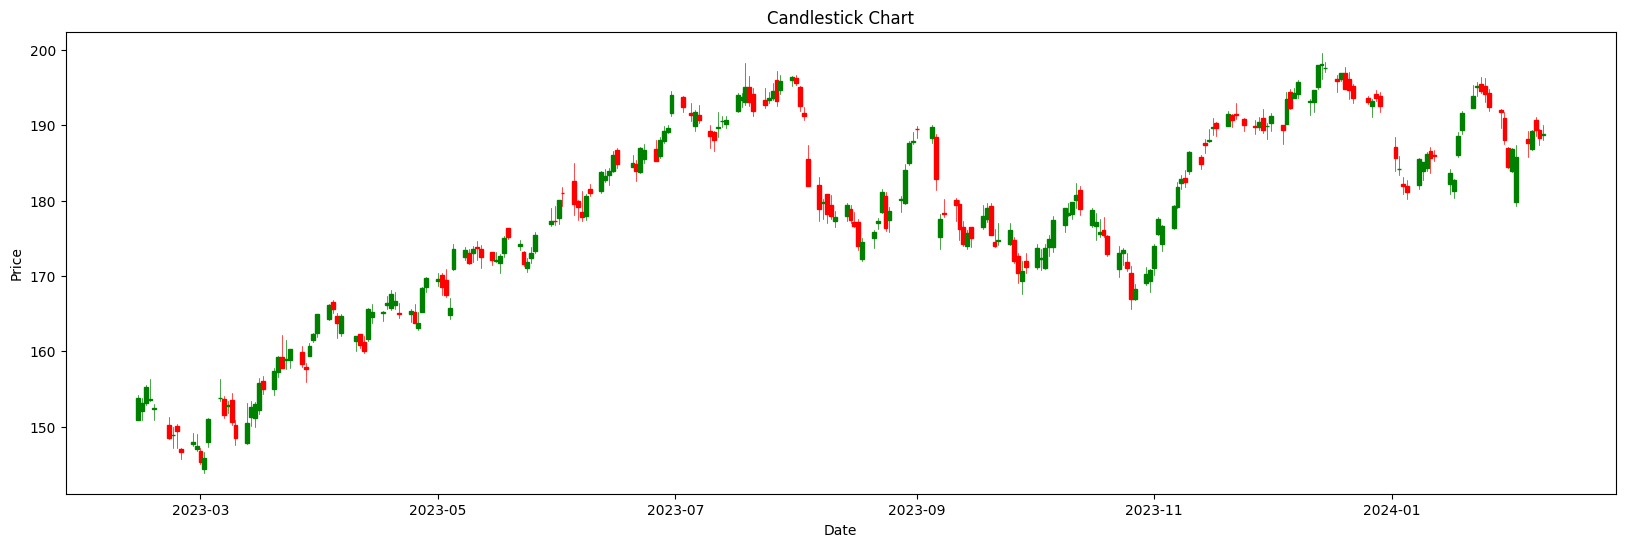

In [6]:
# Plotting Candlestick Chart
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

ohlc_data = data[['Open', 'High', 'Low', 'Close']]  # Remove 'Date' from selection since it's the index
ohlc_data.reset_index(inplace=True)  # Reset index to bring 'Date' back as a column
ohlc_data['Date'] = ohlc_data['Date'].apply(mdates.date2num)

plt.figure(figsize=(20, 6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc_data.values, width=1, colorup='green', colordown='red')
ax.xaxis_date()
plt.title('Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

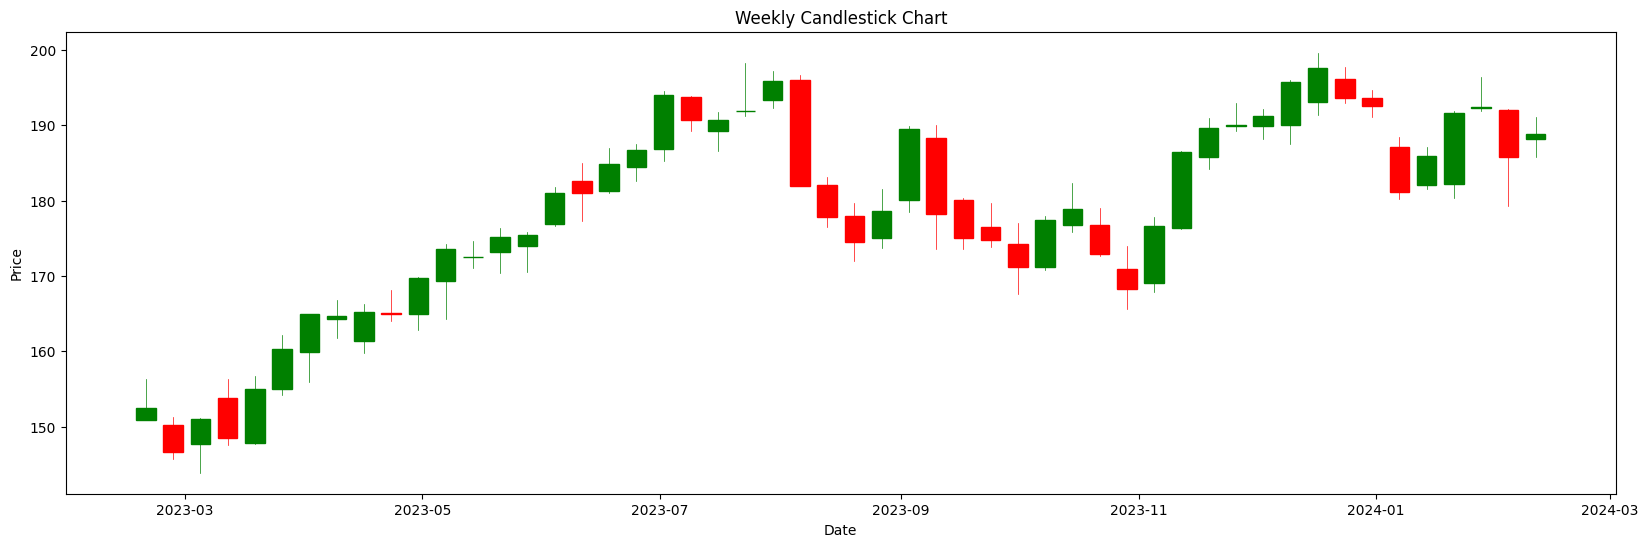

In [7]:
# Resample data to weekly intervals, taking the first, max, min, and last of each column
weekly_data = data.resample('W').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last'})

# Convert the datetime index to numerical format
weekly_data.reset_index(inplace=True)
weekly_data['Date'] = weekly_data['Date'].apply(mdates.date2num)

plt.figure(figsize=(20, 6))
ax = plt.subplot()
candlestick_ohlc(ax, weekly_data.values, width=5, colorup='green', colordown='red')  # Adjust width as per preference
ax.xaxis_date()
plt.title('Weekly Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


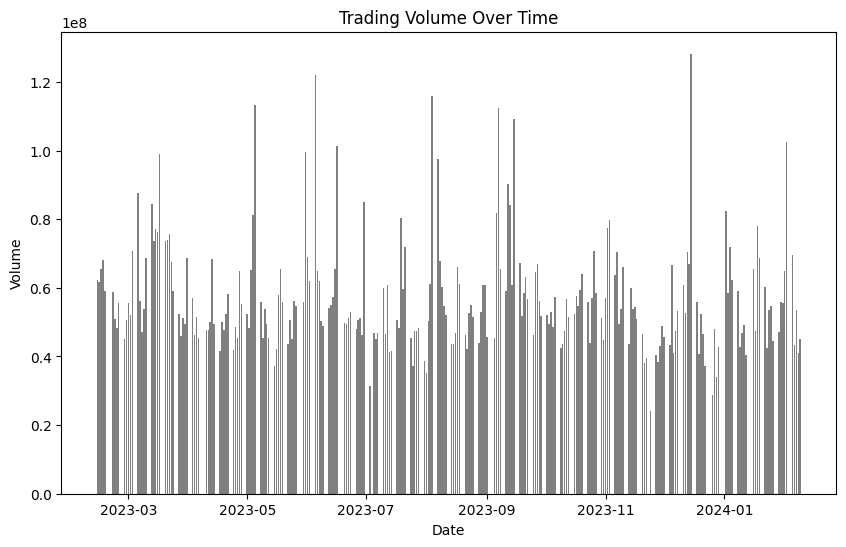

In [8]:
# Plotting Volume Chart
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['Volume'], color='gray')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


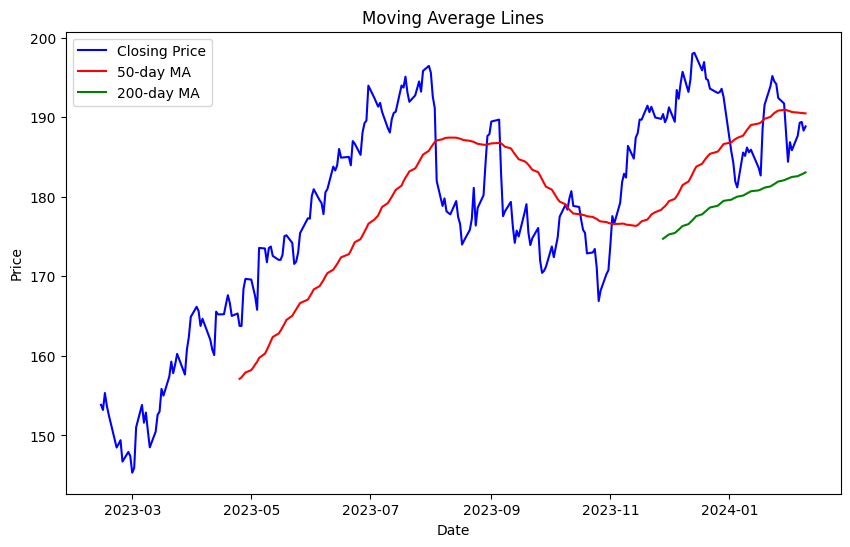

In [9]:
# Plotting Moving Average Lines
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.plot(data.index, data['MA_50'], label='50-day MA', color='red')
plt.plot(data.index, data['MA_200'], label='200-day MA', color='green')
plt.title('Moving Average Lines')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


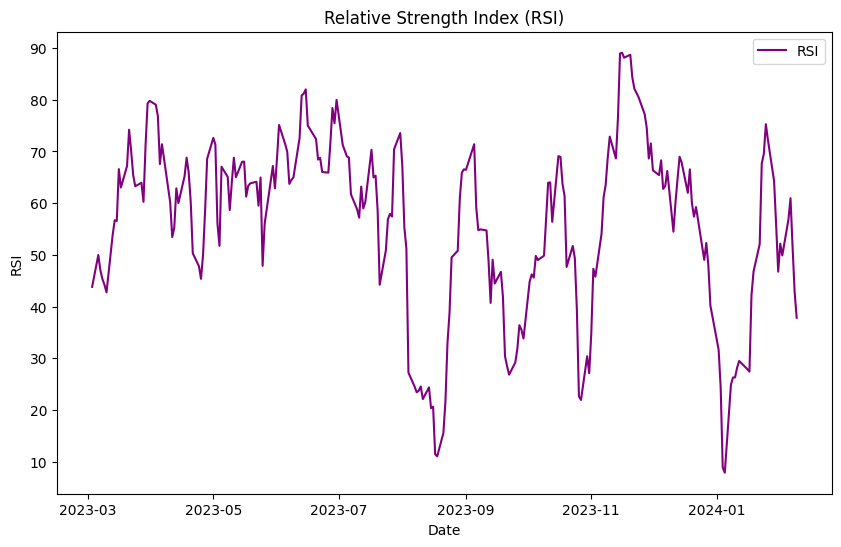

In [10]:
# Plotting RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['RSI'], label='RSI', color='purple')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

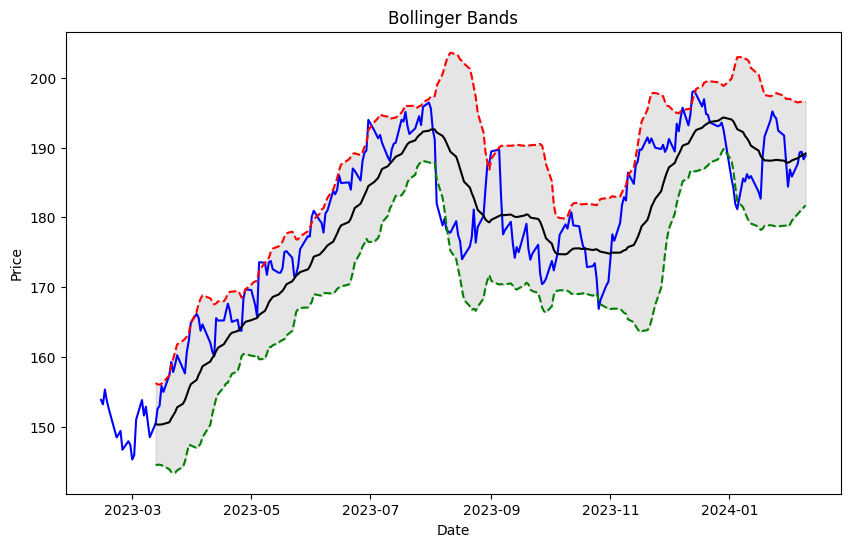

In [11]:
# Plotting Bollinger Bands
data['Rolling Mean'] = data['Close'].rolling(window=20).mean()
data['Upper Band'] = data['Rolling Mean'] + 2 * data['Close'].rolling(window=20).std()
data['Lower Band'] = data['Rolling Mean'] - 2 * data['Close'].rolling(window=20).std()

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.plot(data.index, data['Upper Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(data.index, data['Rolling Mean'], label='20-day Rolling Mean', color='black')
plt.plot(data.index, data['Lower Band'], label='Lower Band', color='green', linestyle='--')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.2)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
